In [1]:
# Import dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

# Import input dataset
charity_df = pd.read_csv('charity_data.csv')
charity_df

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...,...,...
34294,996009318,THE LIONS CLUB OF HONOLULU KAMEHAMEHA,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,996010315,INTERNATIONAL ASSOCIATION OF LIONS CLUBS,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,996012607,PTA HAWAII CONGRESS,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,996015768,AMERICAN FEDERATION OF GOVERNMENT EMPLOYEES LO...,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [2]:
# Generate our categorical variable list
charity_cat = charity_df.dtypes[charity_df.dtypes == "object"].index.tolist()


# Check the number of unique values in each column
charity_df[charity_cat].nunique()

NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
dtype: int64

In [3]:
Name_counts = charity_df.NAME.value_counts()
Name_counts

PARENT BOOSTER USA INC                                      1260
TOPS CLUB INC                                                765
UNITED STATES BOWLING CONGRESS INC                           700
WASHINGTON STATE UNIVERSITY                                  492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC              408
                                                            ... 
SOUTHERN ALLIANCE FOUNDATION FOR PEOPLE & ANIMAL WELFARE       1
FRIENDS OF L A C E S                                           1
CITY OF HOPE                                                   1
GENERAL FEDERATION OF WOMENS CLUBS                             1
TENNESSEE FEDERATION OF FIRE CHAPLAINS                         1
Name: NAME, Length: 19568, dtype: int64

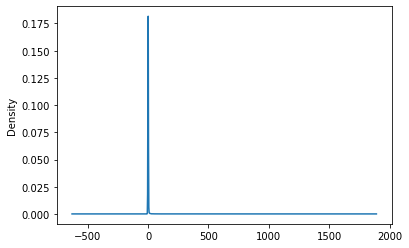

In [4]:
Name_counts.plot.density()

In [5]:
# Determine which values to replace
replace_names = list(Name_counts[Name_counts <= 50].index)

# Replace in DataFrame
for name in replace_names:
    charity_df.NAME = charity_df.NAME.replace(name,"Other")


# Check to make sure binning was successful
charity_df.NAME.value_counts()

Other                                                                 24645
PARENT BOOSTER USA INC                                                 1260
TOPS CLUB INC                                                           765
UNITED STATES BOWLING CONGRESS INC                                      700
WASHINGTON STATE UNIVERSITY                                             492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                         408
PTA TEXAS CONGRESS                                                      368
SOROPTIMIST INTERNATIONAL OF THE AMERICAS INC                           331
ALPHA PHI SIGMA                                                         313
TOASTMASTERS INTERNATIONAL                                              293
MOST WORSHIPFUL STRINGER FREE AND ACCEPTED MASONS                       287
LITTLE LEAGUE BASEBALL INC                                              277
INTERNATIONAL ASSOCIATION OF LIONS CLUBS                                266
MOMS CLUB   

In [6]:
# Create the OneHotEncoder instance
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)

# Fit the encoder and produce encoded DataFrame
encode_df = pd.DataFrame(enc.fit_transform(charity_df.NAME.values.reshape(-1,1)))

# Rename encoded columns
encode_df.columns = enc.get_feature_names(['NAME'])
encode_df.head()

,NAME_AIR FORCE ASSOCIATION,NAME_ALPHA PHI SIGMA,NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES,NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES INC,NAME_AMERICAN ASSOCIATION OF UNIVERSITY WOMEN,NAME_CALIFORNIA GARDEN CLUBS INC,NAME_CISD EDUCATIONAL SUPPORT GROUPS INC,NAME_CIVITAN INTERNATIONAL,NAME_CLEARCREEK I S D SUPPORT GROUPS,NAME_DEMOLAY INTERNATIONAL,...,NAME_THE UNITED STATES PONY CLUBS INC,NAME_TOASTMASTERS INTERNATIONAL,NAME_TOPS CLUB INC,NAME_UNITED STATES BOWLING CONGRESS INC,NAME_UNIVERSITY OF WYOMING,NAME_VETERANS OF FOREIGN WARS OF THE UNITED STATES AUXILIARY,NAME_VFW AUXILIARY DEPARTMENT OF OKLAHOMA INC,NAME_WASHINGTON STATE GRANGE,NAME_WASHINGTON STATE UNIVERSITY,NAME_WORKERS UNITED
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
# Merge the two DataFrames together and drop the Country column
charity_df.merge(encode_df,left_index=True,right_index=True).drop("NAME",1)

,EIN,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,...,NAME_THE UNITED STATES PONY CLUBS INC,NAME_TOASTMASTERS INTERNATIONAL,NAME_TOPS CLUB INC,NAME_UNITED STATES BOWLING CONGRESS INC,NAME_UNIVERSITY OF WYOMING,NAME_VETERANS OF FOREIGN WARS OF THE UNITED STATES AUXILIARY,NAME_VFW AUXILIARY DEPARTMENT OF OKLAHOMA INC,NAME_WASHINGTON STATE GRANGE,NAME_WASHINGTON STATE UNIVERSITY,NAME_WORKERS UNITED
0,10520599,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10531628,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10547893,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10553066,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,10556103,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,996009318,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34295,996010315,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34296,996012607,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34297,996015768,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(charity_df[charity_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(charity_cat)
encode_df.head()

,NAME_AIR FORCE ASSOCIATION,NAME_ALPHA PHI SIGMA,NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES,NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES INC,NAME_AMERICAN ASSOCIATION OF UNIVERSITY WOMEN,NAME_CALIFORNIA GARDEN CLUBS INC,NAME_CISD EDUCATIONAL SUPPORT GROUPS INC,NAME_CIVITAN INTERNATIONAL,NAME_CLEARCREEK I S D SUPPORT GROUPS,NAME_DEMOLAY INTERNATIONAL,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [9]:
# Merge one-hot encoded features and drop the originals
charity_df = charity_df.merge(encode_df,left_index=True, right_index=True)
charity_df = charity_df.drop(charity_cat,1)
charity_df

,EIN,STATUS,ASK_AMT,IS_SUCCESSFUL,NAME_AIR FORCE ASSOCIATION,NAME_ALPHA PHI SIGMA,NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES,NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES INC,NAME_AMERICAN ASSOCIATION OF UNIVERSITY WOMEN,NAME_CALIFORNIA GARDEN CLUBS INC,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,10520599,1,5000,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,10531628,1,108590,1,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,10547893,1,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,10553066,1,6692,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,10556103,1,142590,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,996009318,1,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34295,996010315,1,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34296,996012607,1,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34297,996015768,1,5000,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [10]:
# Split our preprocessed data into our features and target arrays
y = charity_df["IS_SUCCESSFUL"].values
X = charity_df.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [11]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [21]:
# Input layer count
len(X_train[0])

167

In [16]:
# Define the model - deep neural net
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  4
hidden_nodes_layer2 = 2

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 672       
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 3         
Total params: 685
Trainable params: 685
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [20]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=1000)

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=20,callbacks=[cp_callback])

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")


Train on 25724 samples
Epoch 1/20
  480/25724 [..............................] - ETA: 1:06 - loss: 0.5189 - accuracy: 0.7312 
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 2016/25724 [=>............................] - ETA: 16s - loss: 0.4798 - accuracy: 0.7574
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 2752/25724 [==>...........................] - ETA: 12s - loss: 0.4838 - accuracy: 0.7533
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 3936/25724 [===>..........................] - ETA: 9s - loss: 0.4733 - accuracy: 0.7604 
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 4992/25724 [====>.........................] - ETA: 8s - loss: 0.4743 - accuracy: 0.7584
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 5824/25724 [=====>........................] - ETA: 7s - loss: 0.4707 - accuracy: 0.7617
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 6976/25724 [=======>......................] - ETA: 6s - loss: 0.4694 - accuracy: 0.

 4480/25724 [====>.........................] - ETA: 2s - loss: 0.4637 - accuracy: 0.7741
Epoch 00003: saving model to checkpoints/weights.03.hdf5
 5408/25724 [=====>........................] - ETA: 2s - loss: 0.4652 - accuracy: 0.7748
Epoch 00003: saving model to checkpoints/weights.03.hdf5
 6400/25724 [======>.......................] - ETA: 2s - loss: 0.4648 - accuracy: 0.7734
Epoch 00003: saving model to checkpoints/weights.03.hdf5
 7424/25724 [=======>......................] - ETA: 2s - loss: 0.4678 - accuracy: 0.7716
Epoch 00003: saving model to checkpoints/weights.03.hdf5
 8512/25724 [========>.....................] - ETA: 2s - loss: 0.4643 - accuracy: 0.7747
Epoch 00003: saving model to checkpoints/weights.03.hdf5
 9504/25724 [==========>...................] - ETA: 1s - loss: 0.4637 - accuracy: 0.7738
Epoch 00003: saving model to checkpoints/weights.03.hdf5
10464/25724 [===========>..................] - ETA: 1s - loss: 0.4638 - accuracy: 0.7750
Epoch 00003: saving model to checkp

 9568/25724 [==========>...................] - ETA: 1s - loss: 0.4762 - accuracy: 0.7636
Epoch 00005: saving model to checkpoints/weights.05.hdf5
10656/25724 [===========>..................] - ETA: 1s - loss: 0.4772 - accuracy: 0.7643
Epoch 00005: saving model to checkpoints/weights.05.hdf5
11712/25724 [============>.................] - ETA: 1s - loss: 0.4746 - accuracy: 0.7658
Epoch 00005: saving model to checkpoints/weights.05.hdf5
12736/25724 [=============>................] - ETA: 1s - loss: 0.4770 - accuracy: 0.7654
Epoch 00005: saving model to checkpoints/weights.05.hdf5
13216/25724 [==============>...............] - ETA: 1s - loss: 0.4766 - accuracy: 0.7649
Epoch 00005: saving model to checkpoints/weights.05.hdf5
14432/25724 [===============>..............] - ETA: 1s - loss: 0.4762 - accuracy: 0.7655
Epoch 00005: saving model to checkpoints/weights.05.hdf5
15552/25724 [=================>............] - ETA: 0s - loss: 0.4767 - accuracy: 0.7654
Epoch 00005: saving model to checkp

14560/25724 [===============>..............] - ETA: 1s - loss: 0.4741 - accuracy: 0.7699
Epoch 00007: saving model to checkpoints/weights.07.hdf5
15040/25724 [================>.............] - ETA: 1s - loss: 0.4737 - accuracy: 0.7702
Epoch 00007: saving model to checkpoints/weights.07.hdf5
16608/25724 [==================>...........] - ETA: 0s - loss: 0.4755 - accuracy: 0.7687
Epoch 00007: saving model to checkpoints/weights.07.hdf5
17472/25724 [===================>..........] - ETA: 0s - loss: 0.4740 - accuracy: 0.7685
Epoch 00007: saving model to checkpoints/weights.07.hdf5
18368/25724 [====================>.........] - ETA: 0s - loss: 0.4747 - accuracy: 0.7687
Epoch 00007: saving model to checkpoints/weights.07.hdf5
19296/25724 [=====================>........] - ETA: 0s - loss: 0.4747 - accuracy: 0.7689
Epoch 00007: saving model to checkpoints/weights.07.hdf5
20256/25724 [======================>.......] - ETA: 0s - loss: 0.4746 - accuracy: 0.7689
Epoch 00007: saving model to checkp

19168/25724 [=====================>........] - ETA: 0s - loss: 0.4715 - accuracy: 0.7675
Epoch 00009: saving model to checkpoints/weights.09.hdf5
20224/25724 [======================>.......] - ETA: 0s - loss: 0.4714 - accuracy: 0.7675
Epoch 00009: saving model to checkpoints/weights.09.hdf5
21248/25724 [=======================>......] - ETA: 0s - loss: 0.4713 - accuracy: 0.7684
Epoch 00009: saving model to checkpoints/weights.09.hdf5
22176/25724 [========================>.....] - ETA: 0s - loss: 0.4731 - accuracy: 0.7671
Epoch 00009: saving model to checkpoints/weights.09.hdf5
23296/25724 [==========================>...] - ETA: 0s - loss: 0.4743 - accuracy: 0.7668
Epoch 00009: saving model to checkpoints/weights.09.hdf5
24384/25724 [===========================>..] - ETA: 0s - loss: 0.4748 - accuracy: 0.7664
Epoch 00009: saving model to checkpoints/weights.09.hdf5
25504/25724 [============================>.] - ETA: 0s - loss: 0.4752 - accuracy: 0.7665
Epoch 00009: saving model to checkp

24032/25724 [===========================>..] - ETA: 0s - loss: 0.4739 - accuracy: 0.7674
Epoch 00011: saving model to checkpoints/weights.11.hdf5
25120/25724 [============================>.] - ETA: 0s - loss: 0.4749 - accuracy: 0.7664
Epoch 00011: saving model to checkpoints/weights.11.hdf5
25724/25724 [==============================] - 2s 97us/sample - loss: 0.4752 - accuracy: 0.7661
Epoch 12/20
   32/25724 [..............................] - ETA: 3s - loss: 0.4806 - accuracy: 0.7500
Epoch 00012: saving model to checkpoints/weights.12.hdf5
 1248/25724 [>.............................] - ETA: 2s - loss: 0.4797 - accuracy: 0.7716
Epoch 00012: saving model to checkpoints/weights.12.hdf5
 2304/25724 [=>............................] - ETA: 2s - loss: 0.4828 - accuracy: 0.7626
Epoch 00012: saving model to checkpoints/weights.12.hdf5
 3424/25724 [==>...........................] - ETA: 2s - loss: 0.4852 - accuracy: 0.7629
Epoch 00012: saving model to checkpoints/weights.12.hdf5
 4512/25724 [===

 2208/25724 [=>............................] - ETA: 2s - loss: 0.4755 - accuracy: 0.7545
Epoch 00014: saving model to checkpoints/weights.14.hdf5
 3296/25724 [==>...........................] - ETA: 2s - loss: 0.4740 - accuracy: 0.7567
Epoch 00014: saving model to checkpoints/weights.14.hdf5
 4448/25724 [====>.........................] - ETA: 2s - loss: 0.4727 - accuracy: 0.7639
Epoch 00014: saving model to checkpoints/weights.14.hdf5
 5376/25724 [=====>........................] - ETA: 2s - loss: 0.4710 - accuracy: 0.7667
Epoch 00014: saving model to checkpoints/weights.14.hdf5
 6240/25724 [======>.......................] - ETA: 2s - loss: 0.4697 - accuracy: 0.7683
Epoch 00014: saving model to checkpoints/weights.14.hdf5
 7232/25724 [=======>......................] - ETA: 2s - loss: 0.4752 - accuracy: 0.7644
Epoch 00014: saving model to checkpoints/weights.14.hdf5
 8224/25724 [========>.....................] - ETA: 2s - loss: 0.4733 - accuracy: 0.7676
Epoch 00014: saving model to checkp

 6752/25724 [======>.......................] - ETA: 2s - loss: 0.4835 - accuracy: 0.7596
Epoch 00016: saving model to checkpoints/weights.16.hdf5
 8192/25724 [========>.....................] - ETA: 2s - loss: 0.4817 - accuracy: 0.7623
Epoch 00016: saving model to checkpoints/weights.16.hdf5
 9216/25724 [=========>....................] - ETA: 1s - loss: 0.4764 - accuracy: 0.7655
Epoch 00016: saving model to checkpoints/weights.16.hdf5
10304/25724 [===========>..................] - ETA: 1s - loss: 0.4779 - accuracy: 0.7635
Epoch 00016: saving model to checkpoints/weights.16.hdf5
11296/25724 [============>.................] - ETA: 1s - loss: 0.4789 - accuracy: 0.7627
Epoch 00016: saving model to checkpoints/weights.16.hdf5
12288/25724 [=============>................] - ETA: 1s - loss: 0.4770 - accuracy: 0.7638
Epoch 00016: saving model to checkpoints/weights.16.hdf5
13184/25724 [==============>...............] - ETA: 1s - loss: 0.4765 - accuracy: 0.7658
Epoch 00016: saving model to checkp

11680/25724 [============>.................] - ETA: 1s - loss: 0.4798 - accuracy: 0.7628
Epoch 00018: saving model to checkpoints/weights.18.hdf5
12768/25724 [=============>................] - ETA: 1s - loss: 0.4787 - accuracy: 0.7628
Epoch 00018: saving model to checkpoints/weights.18.hdf5
13888/25724 [===============>..............] - ETA: 1s - loss: 0.4807 - accuracy: 0.7608
Epoch 00018: saving model to checkpoints/weights.18.hdf5
15008/25724 [================>.............] - ETA: 1s - loss: 0.4787 - accuracy: 0.7621
Epoch 00018: saving model to checkpoints/weights.18.hdf5
16128/25724 [=================>............] - ETA: 0s - loss: 0.4780 - accuracy: 0.7633
Epoch 00018: saving model to checkpoints/weights.18.hdf5
17184/25724 [===================>..........] - ETA: 0s - loss: 0.4768 - accuracy: 0.7643
Epoch 00018: saving model to checkpoints/weights.18.hdf5
18240/25724 [====================>.........] - ETA: 0s - loss: 0.4748 - accuracy: 0.7665
Epoch 00018: saving model to checkp

16736/25724 [==================>...........] - ETA: 1s - loss: 0.4745 - accuracy: 0.7666
Epoch 00020: saving model to checkpoints/weights.20.hdf5
17856/25724 [===================>..........] - ETA: 0s - loss: 0.4734 - accuracy: 0.7667
Epoch 00020: saving model to checkpoints/weights.20.hdf5
18880/25724 [=====================>........] - ETA: 0s - loss: 0.4738 - accuracy: 0.7672
Epoch 00020: saving model to checkpoints/weights.20.hdf5
19968/25724 [======================>.......] - ETA: 0s - loss: 0.4742 - accuracy: 0.7669
Epoch 00020: saving model to checkpoints/weights.20.hdf5
21056/25724 [=======================>......] - ETA: 0s - loss: 0.4741 - accuracy: 0.7675
Epoch 00020: saving model to checkpoints/weights.20.hdf5
21536/25724 [========================>.....] - ETA: 0s - loss: 0.4743 - accuracy: 0.7672
Epoch 00020: saving model to checkpoints/weights.20.hdf5
22720/25724 [=========================>....] - ETA: 0s - loss: 0.4750 - accuracy: 0.7668
Epoch 00020: saving model to checkp